                                                Michał Lidwa 3ID14A 
                                    Technologie IoT - Analityka Big Data (Projekt)
                                    Temat projektu: Algierskie pożary lasów

O danych:
- Zbiór danych obejmuje 244 przypadki, które przegrupowują dane z dwóch regionów Algierii, mianowicie regionu Bejaia położonego w północno-wschodniej Algierii i regionu Sidi Bel-abbes położonego w północno-zachodniej Algierii.
- 122 instancje dla każdego regionu.
- Okres od czerwca 2012 r. do września 2012 r.
- Zestaw danych zawiera 11 atrybutów i 1 atrybut wyjściowy (klasa)
- 244 instancje zostały podzielone na klasy fire (138 klas), a not fire  (106 klas).

Informacje o atrybutach:
- Date: (day/month/year) Dzień, miesiąc (od 'czerwiec' do 'wrzesień'), rok (2012)

- Temp: Temperatura w południe (maksymalna temperatura) w stopniach Celsjusza: 22 do 42

- RH: Wilgotność względna (w %): 21 do 90

- Ws: Prędkość wiatru (w km/h): 6 do 29

- Rain: Całkowity dzień w mm: 0 do 16,8 FWI Komponenty

- Indeks Dokładnego kodu wilgotności paliwa (FFMC) z systemu FWI: 28,6 do 92,5

- Indeks Kodu wilgotności Duffa (DMC) z systemu FWI: 1.1 do 65,9

- Indeks Kodu suszy (DC) z systemu FWI: od 7 do 220,4

- Indeks Początkowego spreadu (ISI) z systemu FWI: 0 do 18,5

- Indeks Budowania (BUI) z systemu FWI: 1.1 do 68

- Indeks Pogody pożarowej (FWI): 0 do 31.1

- Klasy: Fire and not Fire

Importowanie podstawowych bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
import sqlite3
import statsmodels.api as sm
from sklearn.datasets import load_iris


Odczyt danych z pliku sqlite3 

In [2]:
poloczenie = sqlite3.connect('Algerian_forest_fires_dataset.db')

Przerabianie danych na potrzeby analiz przez bilioteke pandas i zamkniecie bilbioteki

In [3]:
dane = pd.read_sql_query("SELECT * FROM Algerian_forest_fires_dataset ", poloczenie)


In [4]:
poloczenie.close()


Wyswietlenie informacji o danych 

In [5]:
dane.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


Wyświetlenie kolumn danych

In [6]:
dane.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

Wyświetlenie ilosci danych

In [7]:
dane.nunique()


day             33
month            5
year             2
Temperature     20
RH              63
Ws              19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            127
Classes          9
dtype: int64

Wyswietlenie pierwszych 5 wierszy danych

In [8]:
dane.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3,14.2,1.2,3.9,0.5,not fire


Wyświetlenie ostatnich 5 wierszy danych

In [9]:
dane.tail()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0.0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


Wyświetlenie wszystkich danych

In [10]:
print(dane.to_string())

                               day  month  year  Temperature    RH    Ws   Rain  FFMC   DMC      DC   ISI   BUI      FWI        Classes
0                                1      6  2012           29    57    18    0.0  65.7   3.4     7.6   1.3   3.4      0.5    not fire   
1                                2      6  2012           29    61    13    1.3  64.4   4.1     7.6     1   3.9      0.4    not fire   
2                                3      6  2012           26    82    22   13.1  47.1   2.5     7.1   0.3   2.7      0.1    not fire   
3                                4      6  2012           25    89    13    2.5  28.6   1.3     6.9     0   1.7        0    not fire   
4                                5      6  2012           27    77    16    0.0  64.8     3    14.2   1.2   3.9      0.5    not fire   
5                                6      6  2012           31    67    14    0.0  82.6   5.8    22.2   3.1     7      2.5        fire   
6                                7      6  2012 

Opis ilosc danych w tabeli kategoriami

In [11]:
dane.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245.0,245.0,245.0,245,245.0,245,245.0,244
unique,33,5,2,20,63,19,40.0,174.0,167.0,199,107.0,175,127.0,9
top,1,7,2012,35,64,14,0.0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133.0,8.0,5.0,5,8.0,5,12.0,131


Sprawdzanie wartości które sa puste (null)

In [12]:
dane[dane.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,None,None,None,None,None,None,None,None,None,None,None,None,None,None
123,Sidi-Bel Abbes Region Dataset,None,None,None,None,None,None,None,None,None,None,None,None,None
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,None


Podsumowanie danych ile są puste dla danego atrybutu 

In [13]:
dane.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

Usunięcie danych gdzie jest brak danych (null)

In [14]:
dane=dane.dropna().reset_index(drop=True)

Sprawdzanie danych po usunięciu 

In [15]:
dane[dane.isnull().any(axis=1)]



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [16]:
dane.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

Wyswietlenie wszytkich danych po operacji

In [17]:
print(dane.to_string())


     day  month  year  Temperature   RH   Ws   Rain  FFMC   DMC     DC   ISI   BUI   FWI        Classes
0      1      6  2012           29   57   18    0.0  65.7   3.4    7.6   1.3   3.4   0.5    not fire   
1      2      6  2012           29   61   13    1.3  64.4   4.1    7.6     1   3.9   0.4    not fire   
2      3      6  2012           26   82   22   13.1  47.1   2.5    7.1   0.3   2.7   0.1    not fire   
3      4      6  2012           25   89   13    2.5  28.6   1.3    6.9     0   1.7     0    not fire   
4      5      6  2012           27   77   16    0.0  64.8     3   14.2   1.2   3.9   0.5    not fire   
5      6      6  2012           31   67   14    0.0  82.6   5.8   22.2   3.1     7   2.5        fire   
6      7      6  2012           33   54   13    0.0  88.2   9.9   30.5   6.4  10.9   7.2        fire   
7      8      6  2012           30   73   15    0.0  86.6  12.1   38.3   5.6  13.5   7.1        fire   
8      9      6  2012           25   88   13    0.2  52.9   7.9 

Podział danych ze względu na region
1 - Bejaia Region
2 - Sidi-Bel Abbes

In [18]:
dane.loc[:122, 'Region'] = 1
dane.loc[122:, 'Region'] = 2
dane[['Region']] = dane[['Region']].astype('int64')


Wyświetlenie pierwszych 5 dancyh wirszy dla Regionu Bejaia

In [19]:
dane.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


Wyświetlenie pierwszych 5 dancyh wirszy dla Regionu Sidi-Bel Abbes

In [20]:
dane.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [21]:
print(dane.to_string())


     day  month  year  Temperature   RH   Ws   Rain  FFMC   DMC     DC   ISI   BUI   FWI        Classes  Region
0      1      6  2012           29   57   18    0.0  65.7   3.4    7.6   1.3   3.4   0.5    not fire          1
1      2      6  2012           29   61   13    1.3  64.4   4.1    7.6     1   3.9   0.4    not fire          1
2      3      6  2012           26   82   22   13.1  47.1   2.5    7.1   0.3   2.7   0.1    not fire          1
3      4      6  2012           25   89   13    2.5  28.6   1.3    6.9     0   1.7     0    not fire          1
4      5      6  2012           27   77   16    0.0  64.8     3   14.2   1.2   3.9   0.5    not fire          1
5      6      6  2012           31   67   14    0.0  82.6   5.8   22.2   3.1     7   2.5        fire          1
6      7      6  2012           33   54   13    0.0  88.2   9.9   30.5   6.4  10.9   7.2        fire          1
7      8      6  2012           30   73   15    0.0  86.6  12.1   38.3   5.6  13.5   7.1        fire    

Usuniecie lini 122 ze wzgledu na duplikacje nazw atrybutów

In [22]:
dane = dane.drop(122).reset_index(drop=True)


Ponowne sprawdzanie danych po operacji

In [23]:
print(dane.to_string())


    day month  year Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI   FWI        Classes  Region
0     1     6  2012          29  57  18   0.0  65.7   3.4    7.6   1.3   3.4   0.5    not fire          1
1     2     6  2012          29  61  13   1.3  64.4   4.1    7.6     1   3.9   0.4    not fire          1
2     3     6  2012          26  82  22  13.1  47.1   2.5    7.1   0.3   2.7   0.1    not fire          1
3     4     6  2012          25  89  13   2.5  28.6   1.3    6.9     0   1.7     0    not fire          1
4     5     6  2012          27  77  16   0.0  64.8     3   14.2   1.2   3.9   0.5    not fire          1
5     6     6  2012          31  67  14   0.0  82.6   5.8   22.2   3.1     7   2.5        fire          1
6     7     6  2012          33  54  13   0.0  88.2   9.9   30.5   6.4  10.9   7.2        fire          1
7     8     6  2012          30  73  15   0.0  86.6  12.1   38.3   5.6  13.5   7.1        fire          1
8     9     6  2012          25  88  13   0.2 

Przerabianie danych na dataframe na potrzeby analizy

In [24]:
dane.shape

(243, 15)

In [25]:
dane[dane.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


Wyświetlenie danych na dataframe

In [26]:
print(dane.to_string)

<bound method DataFrame.to_string of     day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18   0.0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16   0.0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
238  26     9  2012          30  65  14   0.0  85.4   16  44.5  4.5  16.9   
239  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
240  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
241  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
242  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
0    

Naprawa kolumn

In [27]:
dane.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [28]:
dane.columns = dane.columns.str.strip()



In [29]:
dane.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Sprawdzanie danych po naprawie kolumn

In [30]:
print(dane.to_string())

    day month  year Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI   FWI        Classes  Region
0     1     6  2012          29  57  18   0.0  65.7   3.4    7.6   1.3   3.4   0.5    not fire          1
1     2     6  2012          29  61  13   1.3  64.4   4.1    7.6     1   3.9   0.4    not fire          1
2     3     6  2012          26  82  22  13.1  47.1   2.5    7.1   0.3   2.7   0.1    not fire          1
3     4     6  2012          25  89  13   2.5  28.6   1.3    6.9     0   1.7     0    not fire          1
4     5     6  2012          27  77  16   0.0  64.8     3   14.2   1.2   3.9   0.5    not fire          1
5     6     6  2012          31  67  14   0.0  82.6   5.8   22.2   3.1     7   2.5        fire          1
6     7     6  2012          33  54  13   0.0  88.2   9.9   30.5   6.4  10.9   7.2        fire          1
7     8     6  2012          30  73  15   0.0  86.6  12.1   38.3   5.6  13.5   7.1        fire          1
8     9     6  2012          25  88  13   0.2 

Zmiana typów danych na wymagane typy danych dla odpowiednich funkcji do analizy

In [31]:
dane[['month','day','year','Temperature','RH','Ws']]=dane[['month','day','year','Temperature','RH','Ws']].astype('int64')

In [32]:
obkiekty=[noweobiekty for noweobiekty in dane.columns if dane[noweobiekty].dtypes=='O']

In [33]:
for i in obkiekty:
    if i!='Classes':
        dane[i]=dane[i].astype(float)

Wyświetlenie danych po operacjach

In [34]:
dane.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [35]:
dane.describe()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


Ustawnie klasyfikacji dla klas

In [36]:
dane["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [37]:
dane.Classes = dane.Classes.str.strip()


In [38]:
dane["Classes"].value_counts()


fire        137
not fire    106
Name: Classes, dtype: int64

Ustawienie klasy:
- not fire na 0
- fire na 1


In [39]:
dane['Classes']= np.where(dane['Classes']== 'not fire',0,1)

In [40]:
dane.Classes.value_counts()


1    137
0    106
Name: Classes, dtype: int64

Wyświetlenie korelacji

In [41]:
dane.corr(numeric_only=True)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


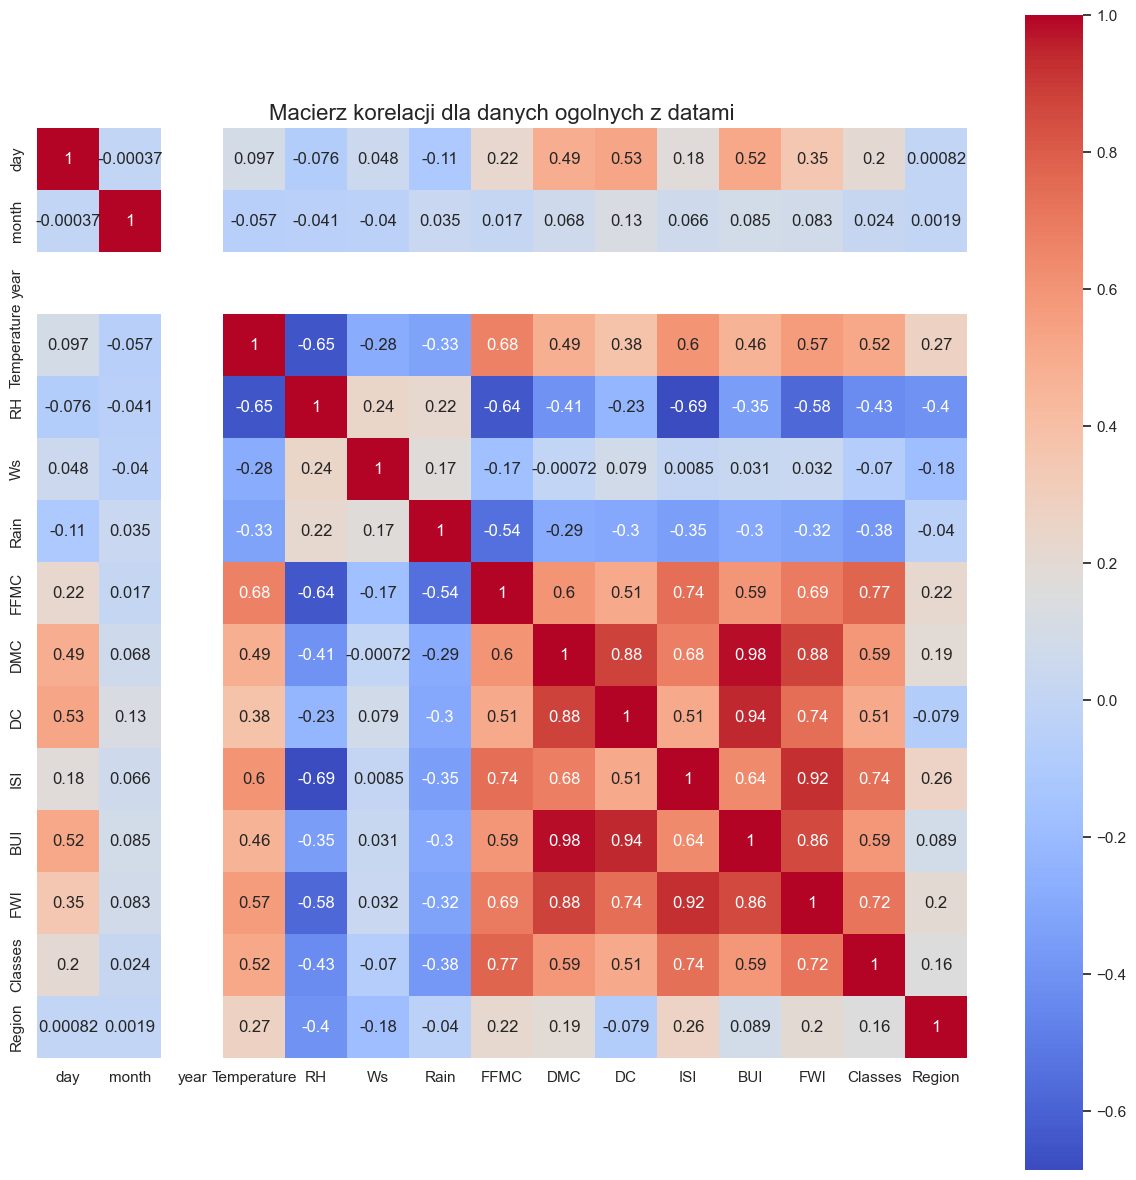

In [42]:
sns.set(style="white")
korelacja = dane.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(korelacja, annot=True, cmap='coolwarm', square=True)
plt.title('Macierz korelacji dla danych ogolnych z datami', fontsize=16)
plt.show()


Wyświetlenie histogramu

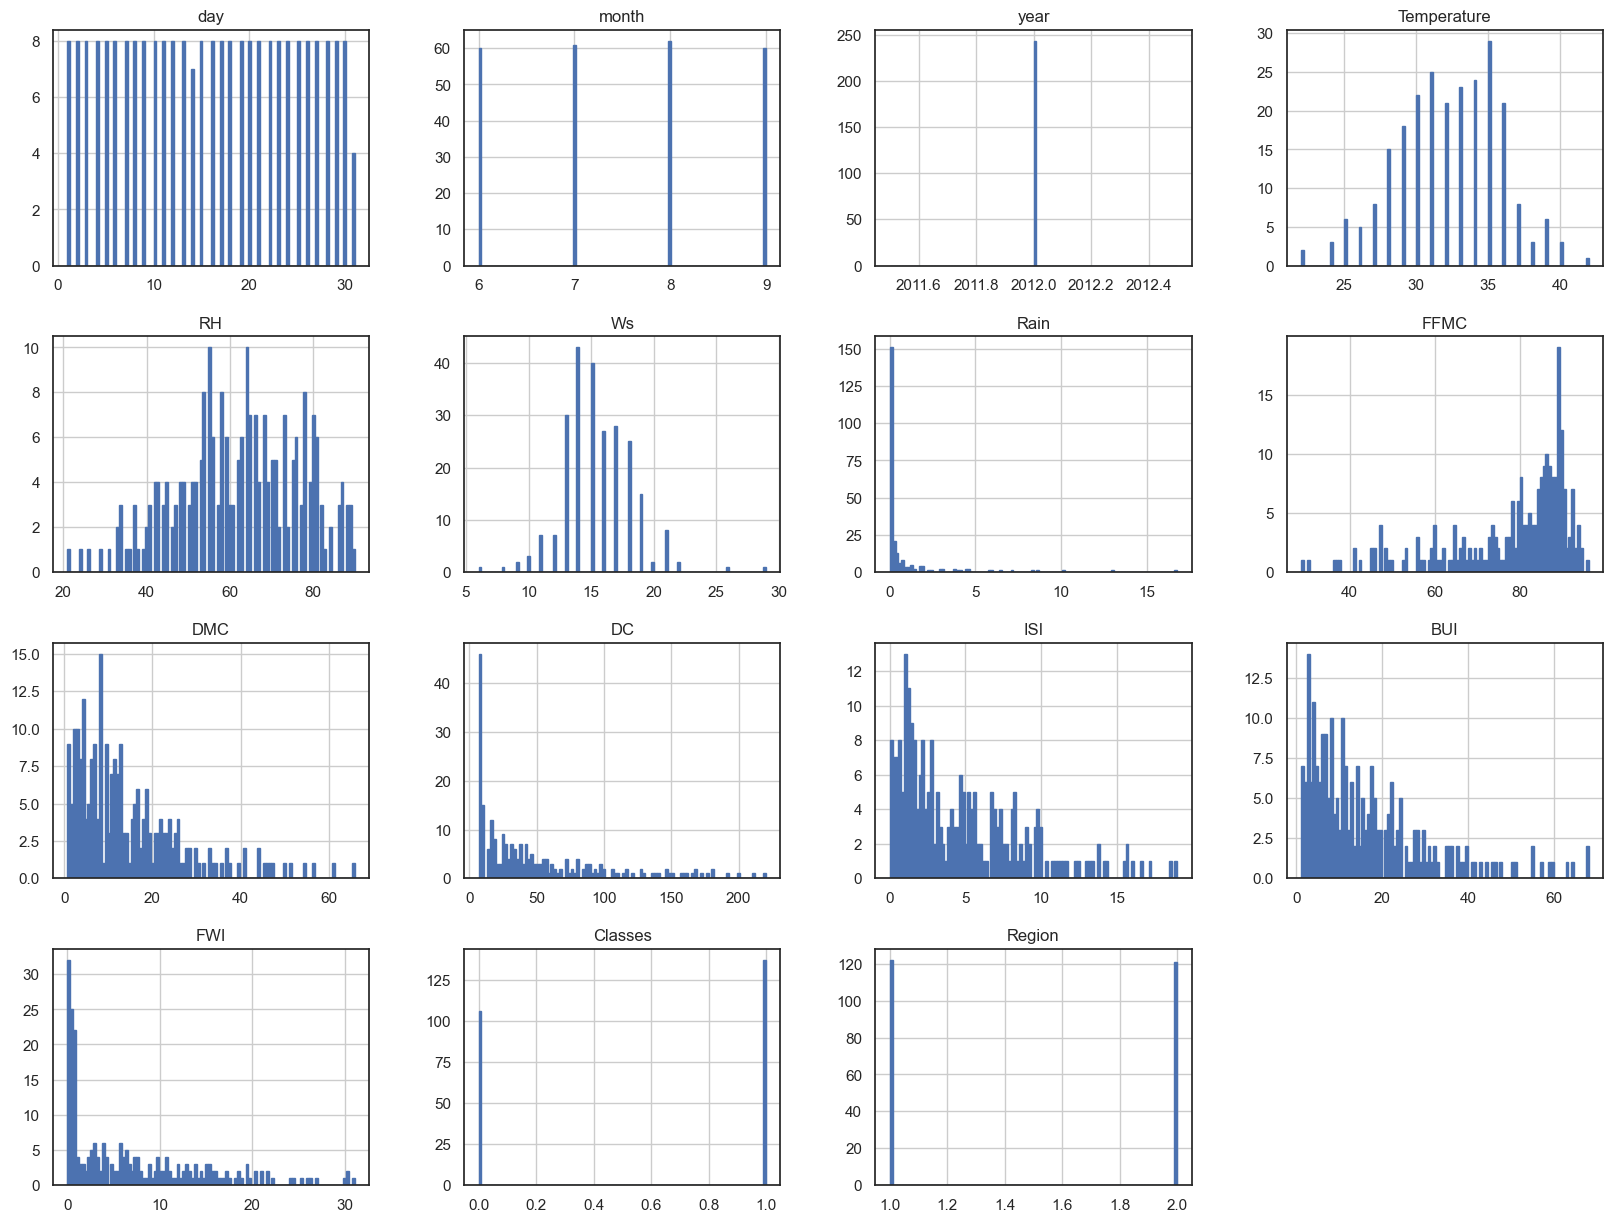

In [43]:
dane.hist(bins=100, figsize=(20, 15), ec='b')
plt.show()


Wykresy rozrzutów

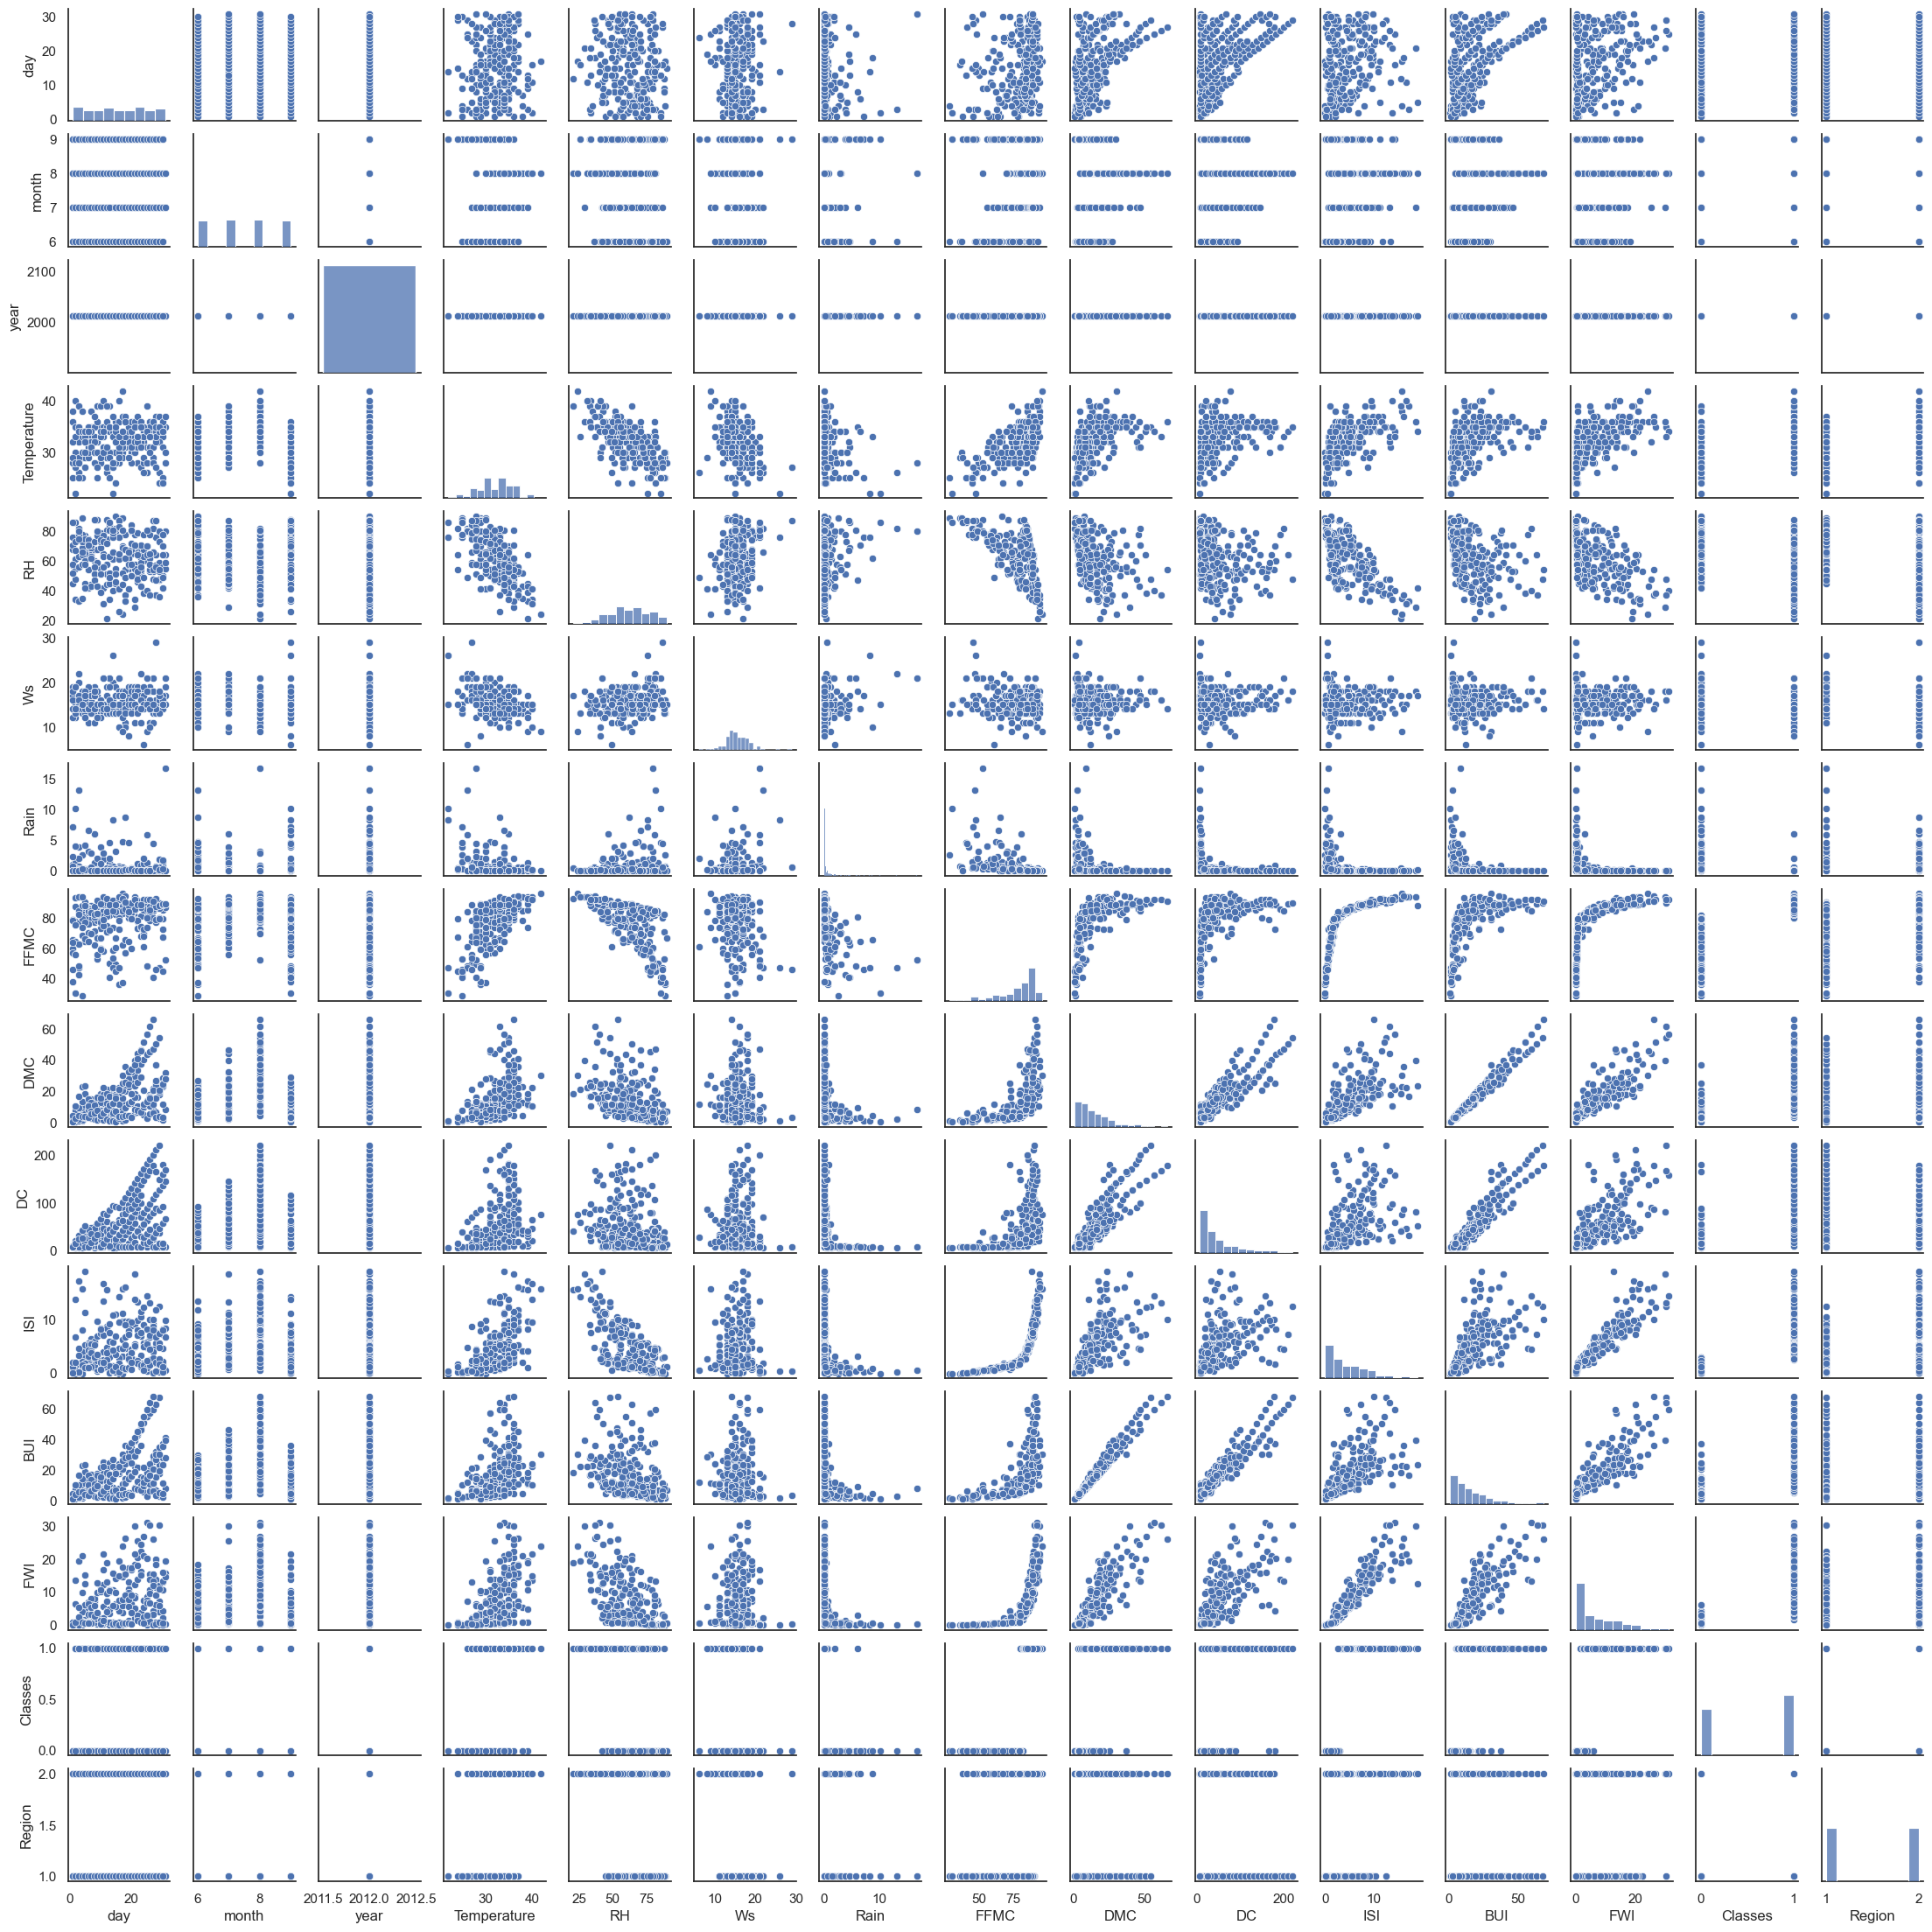

In [44]:
sns.pairplot(dane, height=1.5,
             aspect=1,)


Procent porżarów według klasy

In [45]:
procent = dane.Classes.value_counts(normalize=True)*100
procent


1    56.378601
0    43.621399
Name: Classes, dtype: float64

Analiza pożarów dla Algerii
- klasa 0 - Not Fire
- klasa 1 - Fire

Text(0.5, 1.0, 'Dane według klasy wykres słupkowy \n 0: Not Fire || 1: Fire')

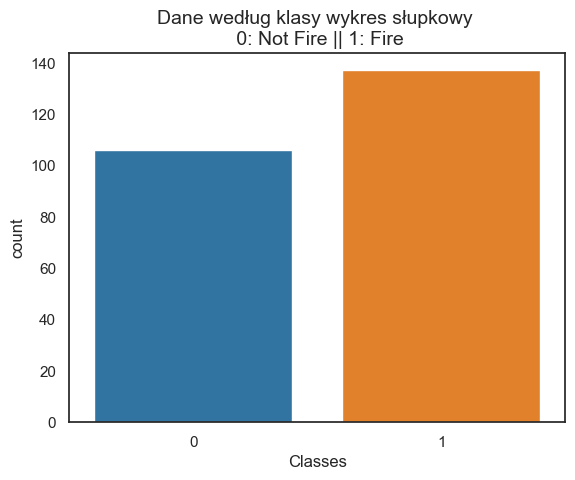

In [46]:
sns.countplot(x='Classes', data=dane, palette="tab10")
plt.title('Dane według klasy wykres słupkowy \n 0: Not Fire || 1: Fire', fontsize=14)


Wykres kołowy

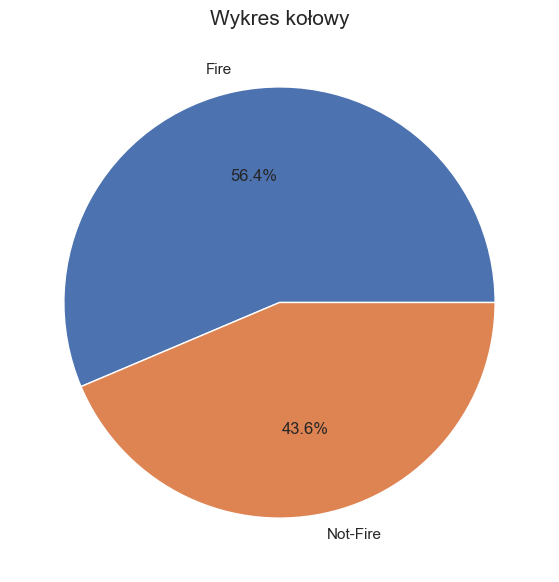

In [47]:
classeslabels = ["Fire", "Not-Fire"]
plt.figure(figsize=(12, 7))
plt.pie(procent, labels=classeslabels, autopct='%1.1f%%')
plt.title("Wykres kołowy", fontsize=15)
plt.show()


Zaznaczenie regionów gdzie są pożary:
- Kolor czerowny - Bejaia
- Kolor niebieski - Sidi Bel Abbes

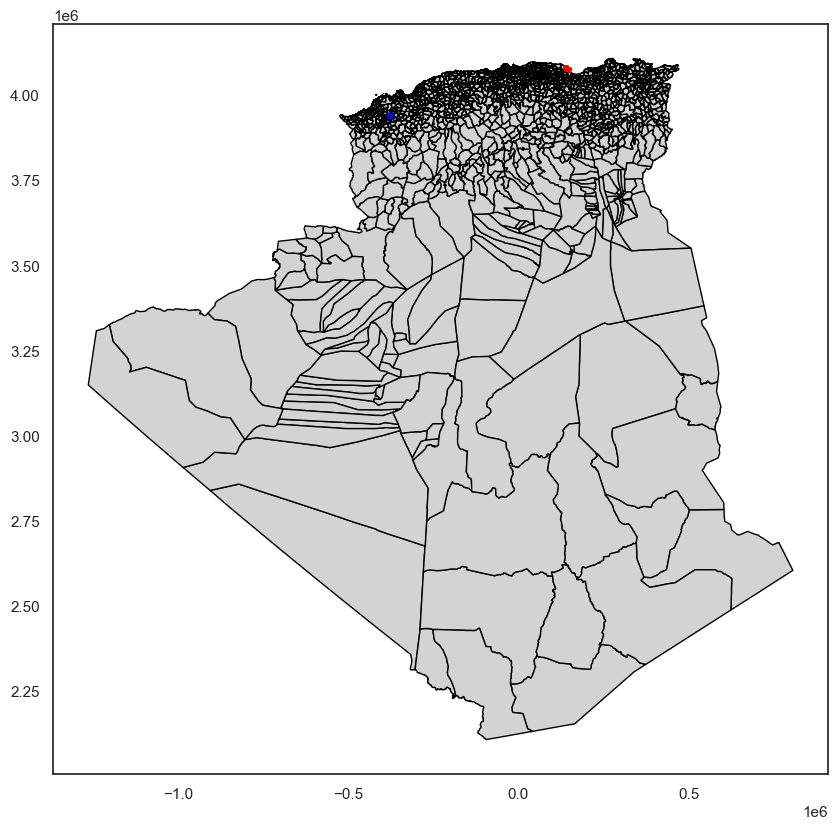

In [48]:
mapaalgerii = gpd.read_file(
    r'.\dza_admbnda_unhcr2020_shp\dza_admbnda_adm2_unhcr_20200120.shp')
bejaia = mapaalgerii.loc[mapaalgerii['ADM2_EN'] == 'Bejaia'].to_crs(epsg=32632)
sidi_bel_abbes = mapaalgerii.loc[mapaalgerii['ADM2_EN']
                                 == 'Sidi Bel Abbes'].to_crs(epsg=32632)

fig, ax = plt.subplots(figsize=(10, 10))
mapaalgerii.to_crs(epsg=32632).plot(
    ax=ax, color='lightgray', edgecolor='black')
bejaia.boundary.plot(ax=ax, color='red', linewidth=2)
sidi_bel_abbes.boundary.plot(ax=ax, color='blue', linewidth=2)

ax.annotate('', xy=(bejaia.centroid.x.iloc[0], bejaia.centroid.y.iloc[0]),
            color='red', fontsize=12, ha='center')
ax.annotate('', xy=(sidi_bel_abbes.centroid.x.iloc[0],
            sidi_bel_abbes.centroid.y.iloc[0]), color='blue', fontsize=12, ha='center')

plt.show()


Analiza pożarów dla Algerii dla danego regionu
- klasa 0 - Not Fire
- klasa 1 - Fire

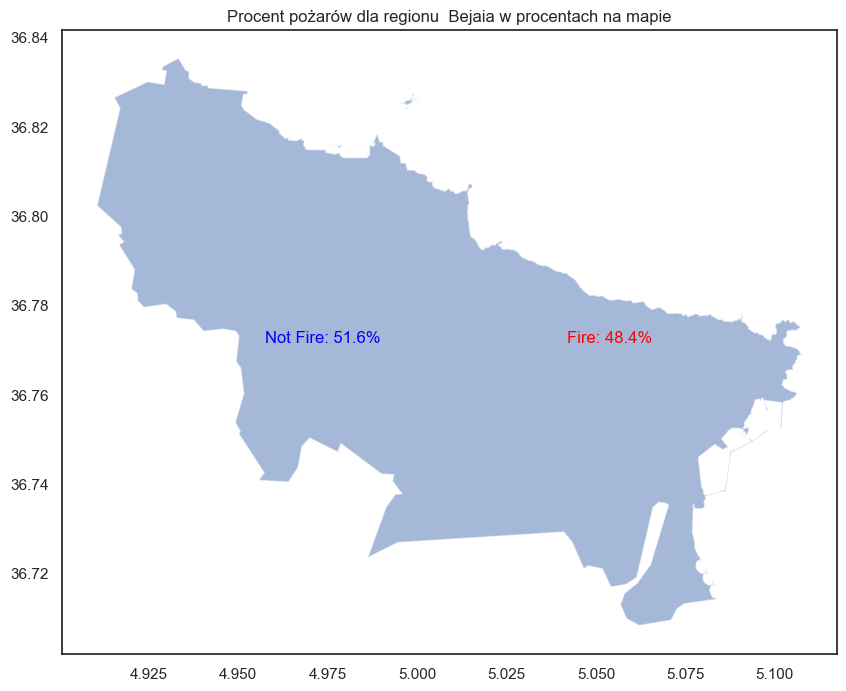

In [49]:
etykietyklasy = ['Not Fire', 'Fire']

mapabejaia = '.\dza_admbnda_unhcr2020_shp\dza_admbnda_adm2_unhcr_20200120.shp'
danemapy = gpd.read_file(mapabejaia)

bejaia = danemapy[danemapy['ADM2_EN'] == 'Bejaia']


bejaia_pozar = dane[dane['Region'] == 1]

procentbejaia = bejaia_pozar['Classes'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(10, 10))
bejaia.plot(ax=ax, alpha=0.5)

for idx, row in bejaia.iterrows():
    for i, val in enumerate(procentbejaia):
        if i == 0:  
            color = 'blue'
            text = f"{etykietyklasy[0]}: {val:.1f}%"
            x_offset = -0.030  
        else:  
            color = 'red'
            text = f"{etykietyklasy[1]}: {val:.1f}%"
            x_offset = 0.050  
        ax.annotate(text=text, xy=(
            row.geometry.centroid.x + x_offset, row.geometry.centroid.y), color=color, ha='center', fontsize=12)


plt.title('Procent pożarów dla regionu  Bejaia w procentach na mapie')


plt.show()


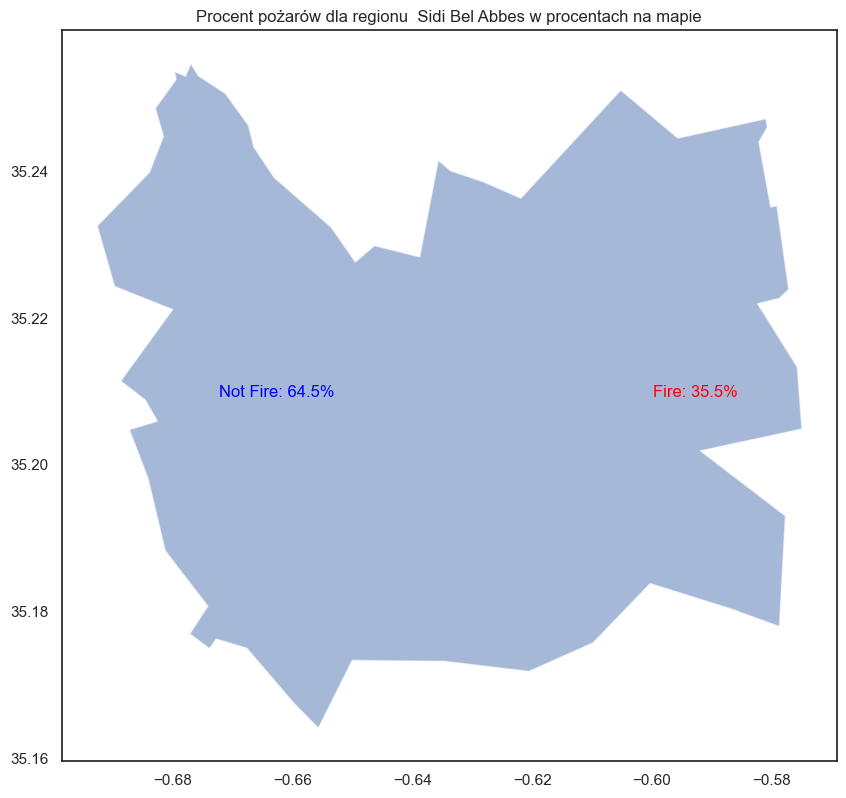

In [50]:
etykietyklasy = ['Not Fire', 'Fire']

mapa_sidi_bel_abbes = '.\dza_admbnda_unhcr2020_shp\dza_admbnda_adm2_unhcr_20200120.shp'
danemapy = gpd.read_file(mapa_sidi_bel_abbes)

Sidi_bel_abbes = danemapy[danemapy['ADM2_EN'] == 'Sidi Bel Abbes']


Sidi_bel_abbes_pozar= dane[dane['Region'] == 2]

procentsidibel = Sidi_bel_abbes_pozar['Classes'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(10, 10))
Sidi_bel_abbes.plot(ax=ax, alpha=0.5)

for idx, row in Sidi_bel_abbes.iterrows():
    for i, val in enumerate(procentsidibel):
        if i == 0:  
            color = 'blue'
            text = f"{etykietyklasy[0]}: {val:.1f}%"
            x_offset = -0.030 
        else:  
            color = 'red'
            text = f"{etykietyklasy[1]}: {val:.1f}%"
            x_offset = 0.040  
        ax.annotate(text=text, xy=(
            row.geometry.centroid.x + x_offset, row.geometry.centroid.y), color=color, ha='center', fontsize=12)


plt.title('Procent pożarów dla regionu  Sidi Bel Abbes w procentach na mapie')


plt.show()

Analiza pożarów dla Algerii i dla danych regionów dla danego miesiąca
- klasa 0 - Not Fire
- klasa 1 - Fire

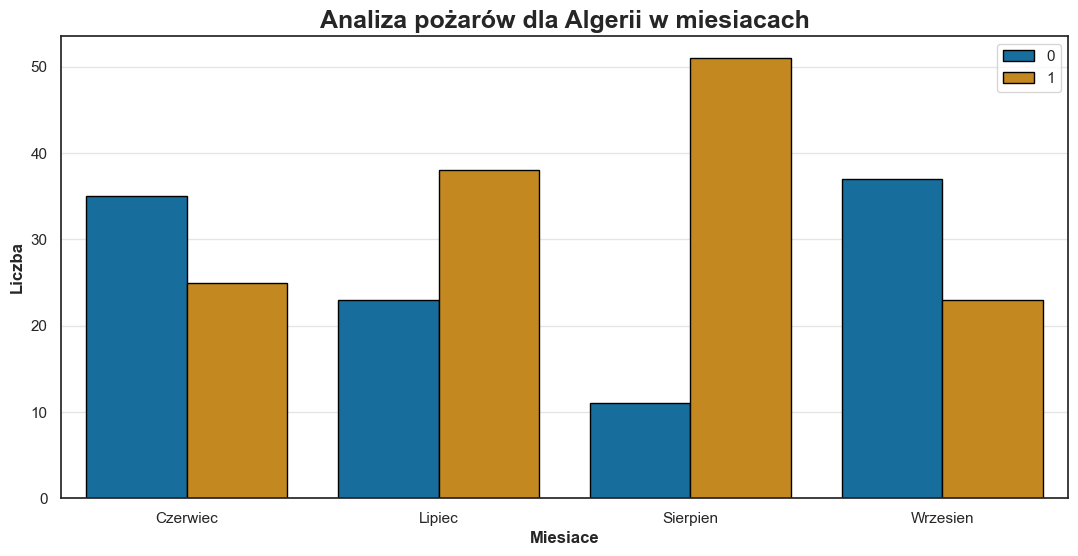

In [51]:
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dane,
              ec='black', palette='colorblind')
plt.title('Analiza pożarów dla Algerii w miesiacach',
          fontsize=18, weight='bold')
plt.ylabel('Liczba', weight='bold')
plt.xlabel('Miesiace', weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['Czerwiec', 'Lipiec', 'Sierpien', 'Wrzesien',])
plt.grid(alpha=0.5, axis='y')
plt.show()


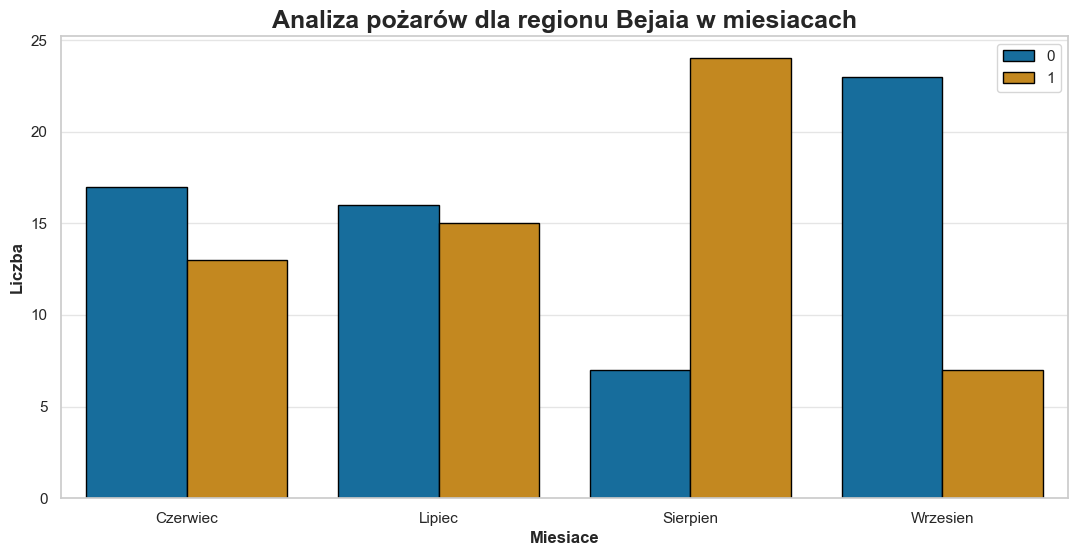

In [52]:
nowedane = dane.loc[dane['Region'] == 1]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=nowedane,
              ec='black', palette='colorblind')
plt.title('Analiza pożarów dla regionu Bejaia w miesiacach',
          fontsize=18, weight='bold')
plt.ylabel('Liczba', weight='bold')
plt.xlabel('Miesiace', weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['Czerwiec', 'Lipiec', 'Sierpien', 'Wrzesien',])
plt.grid(alpha=0.5, axis='y')
plt.show()


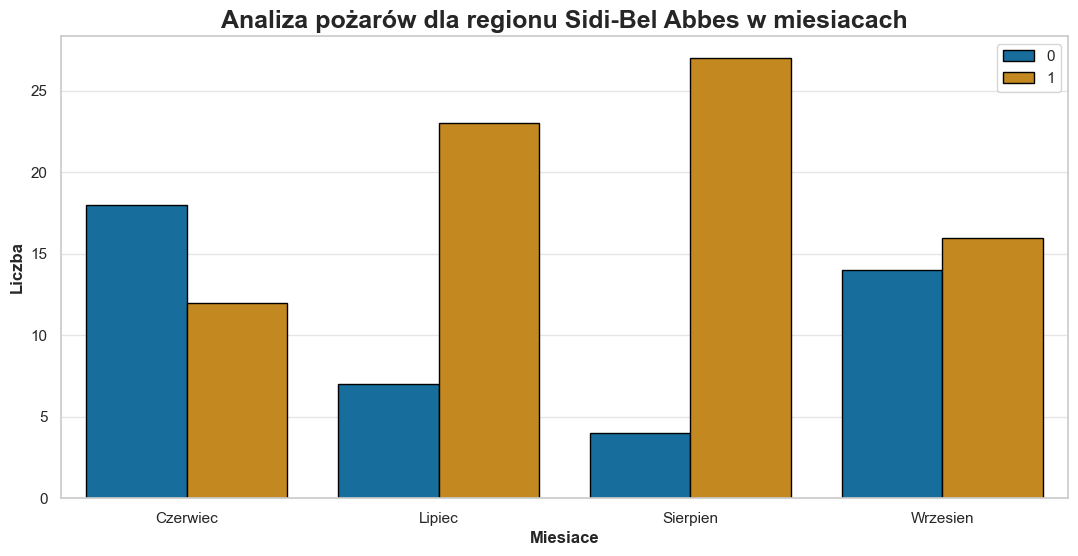

In [53]:
nowedane = dane.loc[dane['Region'] == 2]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=nowedane,
              ec='black', palette='colorblind')
plt.title('Analiza pożarów dla regionu Sidi-Bel Abbes w miesiacach',
          fontsize=18, weight='bold')
plt.ylabel('Liczba', weight='bold')
plt.xlabel('Miesiace', weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['Czerwiec', 'Lipiec', 'Sierpien', 'Wrzesien',])
plt.grid(alpha=0.5, axis='y')
plt.show()



Analiza regresji

Usunięcie dnia meisiaca i roku na prztrzeby regresji analizy

In [54]:

dane = dane.drop(['day', 'month', 'year'], axis=1)
dane.head(10)


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


Podział zbioru danych na funkcję wejściową i wyjściową do analizy regresji

In [55]:
x = dane.iloc[:,0:10]
y= dane['FWI']

In [56]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [57]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

Podział zestawu danych na zbiór uczący i zbiór testowy 

In [58]:
x_uczacy, x_testujacy, y_uczacy , y_testujacy = train_test_split(x, y, test_size=0.25,
                                                        random_state=0)
x_uczacy.shape, x_testujacy.shape


((182, 10), (61, 10))

In [59]:
x_testujacy.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

Korelacja uczących danych

In [60]:
x_uczacy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.918573
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.855633
FWI,0.575406,-0.594299,0.013239,-0.326426,0.704563,0.882314,0.746551,0.918573,0.855633,1.000000


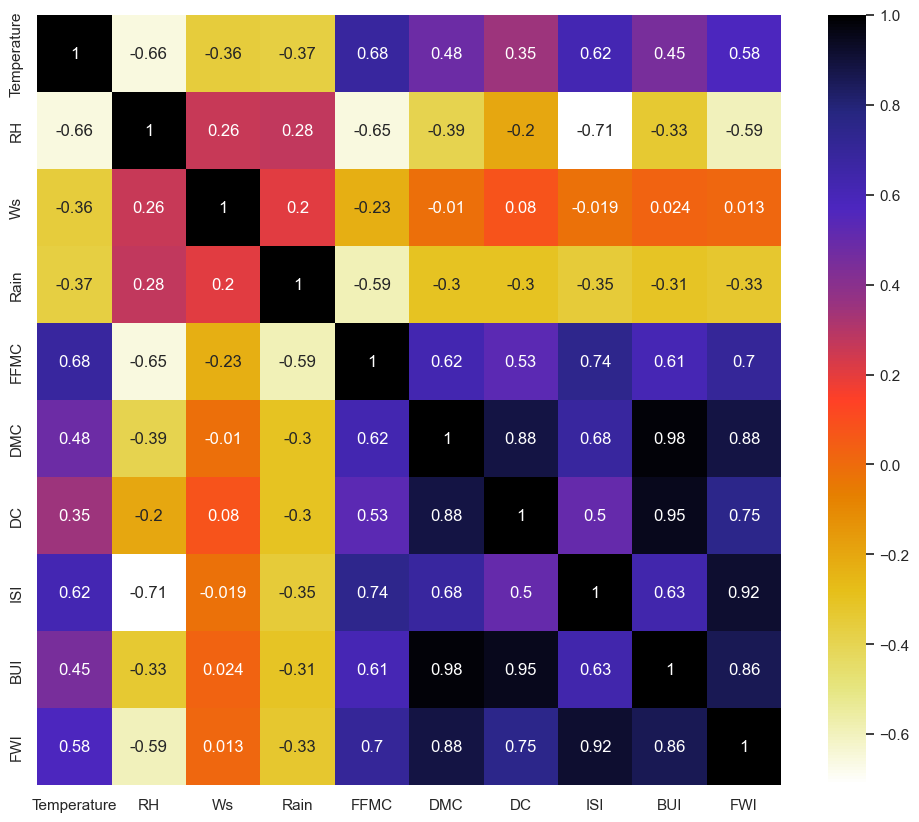

In [61]:
plt.figure(figsize=(12, 10))
korelacja = x_uczacy.corr()
sns.heatmap(korelacja, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


Analizując wyniki korelacji, można zauważyć, że:

- Temperatura ma silną dodatnią korelację z FFMC, a także pozytywną korelację z FWI, BUI i ISI. Oznacza to, że wyższa temperatura zwiększa poziom wysuszonych paliw, co z kolei prowadzi do wzrostu zagrożenia pożarowego.

- Wilgotność względna (RH) ma silną negatywną korelację z FFMC oraz negatywną korelację z FWI, BUI i ISI. Oznacza to, że wyższa wilgotność powietrza zmniejsza poziom wysuszonych paliw i obniża zagrożenie pożarowe.

- Prędkość wiatru (Ws) ma słabą dodatnią korelację z FFMC, a także słabą dodatnią korelację z FWI, BUI i ISI. Oznacza to, że wyższa prędkość wiatru może zwiększyć rozprzestrzenianie się pożaru.

- Opady deszczu mają negatywną korelację z FFMC, FWI, BUI i ISI. Oznacza to, że opady deszczu mogą zmniejszyć poziom wysuszonych paliw i obniżyć zagrożenie pożarowe.

- Składowe FWI (BUI, ISI, FFMC, DMC i DC) są ze sobą silnie skorelowane, co jest zrozumiałe, biorąc pod uwagę, że FWI jest złożonym wskaźnikiem, który uwzględnia wpływ wszystkich tych składowych na zagrożenie pożarowe. Warto zauważyć, że DMC i DC mają silną pozytywną korelację między sobą, co wskazuje na to, że wyższy poziom wilgoci w glebie wpływa na zwiększenie poziomu wilgoci w glebie organicznej, co z kolei zmniejsza zagrożenie pożarowe.

Sprawdzanie korelacji dla niezależnych cech, a cechy o korelacji większej niż 0,7 gdzie reszta zostanie usunieta z analizy

In [62]:
def korelacjafunkcja(dane, prog):
    kolumna_korelacji = set()
    kolumna_macierzy = dane.corr()
    for i in range(len(kolumna_macierzy.columns)):
        for j in range(i):
            if abs(kolumna_macierzy.iloc[i, j]) > prog:
                colname = kolumna_macierzy.columns[i]
                kolumna_korelacji.add(colname)
    return kolumna_korelacji


In [63]:
nowakorelacja = korelacjafunkcja(x_uczacy, 0.7)
nowakorelacja


{'BUI', 'DC', 'FWI', 'ISI'}

Usówanie 4 atrybutów ze wzgledu na korleacje wyzsza niz 0,7

In [64]:
x_uczacy.drop(nowakorelacja, axis=1, inplace=True)
x_testujacy.drop(nowakorelacja, axis=1, inplace=True)
x_uczacy.shape
x_testujacy.shape


(61, 6)

Skalowanie 

In [65]:
def skalowaniefunkcja(x_uczacy, x_testujacy):
    skalowanie = StandardScaler()
    x_uczacy_skalowane = skalowanie.fit_transform(x_uczacy)
    x_testujacy_skalowane = skalowanie.transform(x_testujacy)

    return x_uczacy_skalowane, x_testujacy_skalowane


In [66]:
x_uczacy_skalowane, x_testujacy_skalowane = skalowaniefunkcja(x_uczacy, x_testujacy)


Text(0.5, 1.0, 'Dane uczace po skalowaniu')

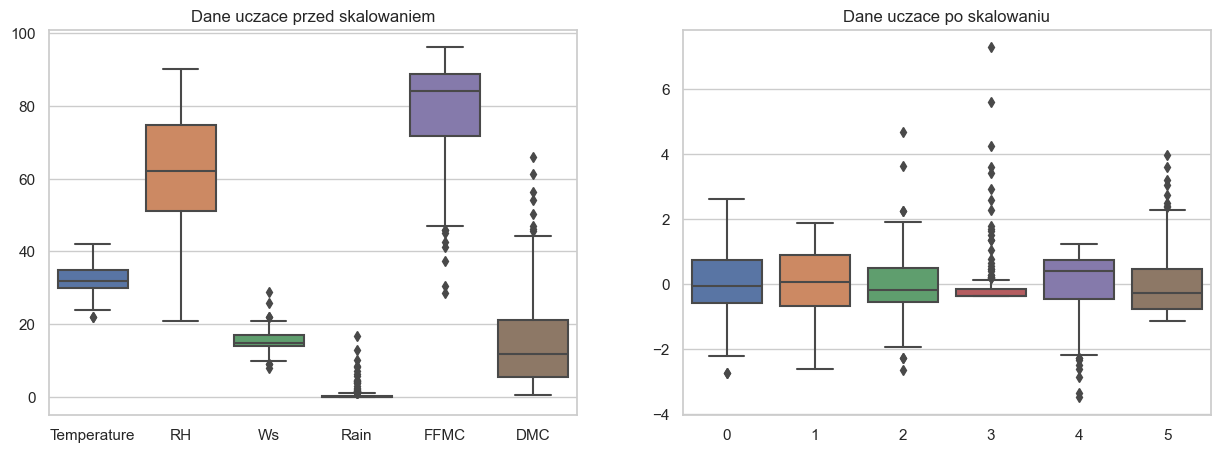

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=x_uczacy, ax=ax1)
ax1.set_title('Dane uczace przed skalowaniem')
sns.boxplot(data=x_uczacy_skalowane, ax=ax2)
ax2.set_title('Dane uczace po skalowaniu')



Regresja liniowa

In [68]:
Regresjaliniowa = LinearRegression()
Regresjaliniowa.fit(x_uczacy_skalowane, y_uczacy)


LinearRegression()

In [69]:
print('Przechwycenie wynosi :',Regresjaliniowa.intercept_)
print('Współczynnik wynosi :',Regresjaliniowa.coef_)

Przechwycenie wynosi : 7.558791208791209
Współczynnik wynosi : [ 0.36394299 -1.99797066  0.98619421  0.04636838  0.80703533  5.44395047]


In [70]:
print("Uczace dane wynik:",Regresjaliniowa.score(x_uczacy_skalowane, y_uczacy))
print("Testowe dane wynik:",Regresjaliniowa.score(x_testujacy_skalowane,y_testujacy))

Uczace dane wynik: 0.8671797758215145
Testowe dane wynik: 0.7064857305909149


In [71]:
Regresjaliniowa_predykcja = Regresjaliniowa.predict(x_testujacy_skalowane)
Regresjaliniowa_predykcja


array([ 6.71133901, 12.02490235,  7.17708272,  8.24813881,  5.87107049,
       10.06783722, -1.57757075,  9.49762004,  6.91005123, 11.61699016,
        1.59431776, 13.00464249, 10.62115882, 12.84924636,  2.76686137,
       -0.28105695,  5.56265496,  5.29475405,  2.8722131 , -2.08125537,
       14.70243078,  5.2585157 , 11.12180353, -1.61398266,  2.36852748,
        5.45039685, 10.68723643, -0.14835576,  0.73216072,  2.91307288,
       11.58970348,  0.80835466, -1.68692435, 19.3097082 ,  2.70799081,
        2.90471917,  4.61345951, 20.52842245, 26.80883138,  6.4163819 ,
        6.1327361 ,  3.2544518 , -4.1397093 ,  3.91659235,  1.16929796,
       -5.4031485 ,  7.39875906,  4.74298501, -4.2341344 , 17.30309118,
        3.21502256,  8.83942816, -2.46778223,  0.69332504,  4.5829139 ,
        1.50799021, 10.54082105,  7.88725824,  8.47179454, 17.63579458,
        1.8425123 ])

In [72]:
Aktualna_predykcja = pd.DataFrame(
    {'Aktualny przychod': y_testujacy, 'Predykcja przychodu': Regresjaliniowa_predykcja})
Aktualna_predykcja


,Aktualny przychod,Predykcja przychodu
110,9.7,6.711339
150,7.2,12.024902
37,8.0,7.177083
75,6.3,8.248139
109,7.7,5.871070
...,...,...
179,10.9,10.540821
160,3.1,7.887258
159,3.0,8.471795
170,17.3,17.635795


In [73]:
absolutnyblad = metrics.mean_absolute_error(y_testujacy,Regresjaliniowa_predykcja)
sredniblad = metrics.mean_squared_error(y_testujacy, Regresjaliniowa_predykcja)
glownyblad = np.sqrt(metrics.mean_squared_error(
    y_testujacy, Regresjaliniowa_predykcja))

print('Aboslutny bład:', absolutnyblad)
print('Sredni bład:', sredniblad)
print('Główny bład:', glownyblad)


Aboslutny bład: 2.420707955240326
Sredni bład: 10.189169987051969
Główny bład: 3.192047929942777


In [74]:
wynik =  r2_score(y_testujacy, Regresjaliniowa_predykcja)
print("Współczynnik determinacji:",wynik)

Współczynnik determinacji: 0.7064857305909149


Regresja w formie modelu OLS

In [75]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.200e+30
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:54:37   Log-Likelihood:                 7274.7
No. Observations:                 243   AIC:                        -1.453e+04
Df Residuals:                     232   BIC:                        -1.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.914e-15   3.16e-14      0.092      

Przy regresji OLS znajduje sie 10 zmiennych

R-kwadrat wynosi 0,86, co oznacza, że 86% zmienności zmiennej zależnej Classes może być wyjaśnione przez zmienne niezależne w tym modelu. Współczynnik R-kwadrat skorygowany wynosi 0,854, co oznacza, że model jest dobrze dopasowany do danych.

Każda z zmiennych niezależnych ma swój współczynnik. Współczynnik jest estymowanym przeciętnym wpływem danej zmiennej niezależnej na zmienną zależną przy założeniu, że wszystkie inne zmienne niezależne są stałe. Współczynniki dla zmiennych Temperature, RH, Ws, FFMC, DMC i ISI są istotne statystycznie, ponieważ mają wartości p mniejsze niż 0,05. Oznacza to, że zmienne te mają istotny wpływ na zmienną zależną Classes.

Zmienne Rain, DC, BUI i FWI nie są istotne statystycznie, ponieważ mają wartości p większe niż 0,05. Oznacza to, że zmienne te nie mają istotnego wpływu na zmienną zależną Classes w tym modelu.

Najbardziej znaczące atrybuty

In [76]:

znaczaceatrybuty = Regresjaliniowa.coef_
znaczaceatrybutytabela = pd.DataFrame({
    'Atrybuty': x_uczacy.columns,
    'Znaczenie': znaczaceatrybuty
}).sort_values('Znaczenie', ascending=False)
znaczaceatrybutytabela


,Atrybuty,Znaczenie
5,DMC,5.443950
2,Ws,0.986194
4,FFMC,0.807035
0,Temperature,0.363943
3,Rain,0.046368
1,RH,-1.997971


Text(0, 0.5, 'Features')

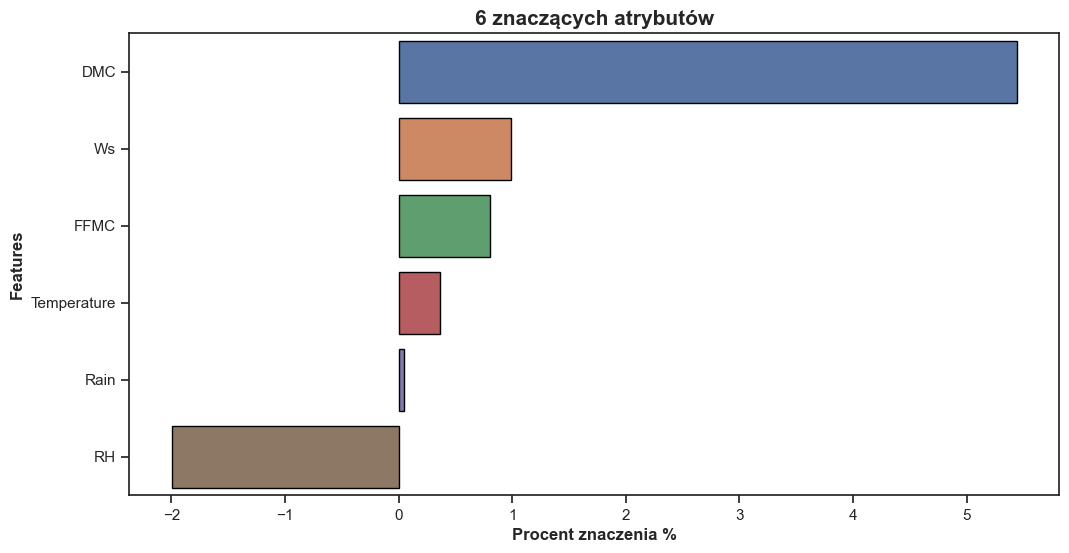

In [77]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=znaczaceatrybutytabela,
                 x='Znaczenie', y='Atrybuty', ec='black')
ax.set_title('6 znaczących atrybutów', weight='bold',fontsize = 15)
ax.set_xlabel('Procent znaczenia %',weight='bold')
ax.set_ylabel('Features',weight='bold')

- (DMC) Indeks Kodu wilgotności Duffa - Wynosi ponad 5%
- (Ws) Prędkość wiatru Wynosi troche ponad 1%
- (FFMC) Indeks Dokładnego kodu wilgotności paliwa - prawie 1 %
- (Temperatue)  Temperatura w południe maksymalna wynosi prawie 0.4 %
- (Rain) Całkowity dzień opadów wynosi troche niz 0 %
- (RH)  Wilgotność względna wynosi prawie -2% 

Klasyfikacja


In [78]:
dane.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [79]:
x = dane.iloc[:, 0:10]
y = dane['Classes']


In [80]:
x.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [81]:
y.head(10)


0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int32

In [82]:

x_uczacy, x_testujacy, y_uczacy, y_testujacy = train_test_split(
    x, y, test_size=0.3, random_state=0)
x_uczacy.shape, x_testujacy.shape


((170, 10), (73, 10))

In [83]:
x_uczacy.columns


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [84]:
x_testujacy.columns


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [85]:
korelacjanowadrzewo = korelacjafunkcja(x_uczacy, 0.7)
korelacjanowadrzewo

{'BUI', 'DC', 'FWI', 'ISI'}

In [86]:
x_uczacy.drop(korelacjanowadrzewo, axis=1, inplace=True)
x_testujacy.drop(korelacjanowadrzewo, axis=1, inplace=True)
x_uczacy.shape, x_testujacy.shape


((170, 6), (73, 6))

In [87]:
x_uczacy_skalowane, x_testujacy_skalowane = skalowaniefunkcja(x_uczacy, x_testujacy)


Drzewo dezycyjne

In [88]:
Drzewodezycyjne = DecisionTreeClassifier()
Drzewodezycyjne.fit(x_uczacy_skalowane,y_uczacy)

DecisionTreeClassifier()

In [89]:
Drzewodezycyjne_predykcja = Drzewodezycyjne.predict(x_testujacy_skalowane)
Drzewodezycyjne_predykcja


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [90]:
Aktualna_predykcja = pd.DataFrame(
    {'Aktualny przychod ': y_testujacy, 'Predykcjonowany przychod': Drzewodezycyjne_predykcja})
Aktualna_predykcja


,Aktualny przychod,Predykcjonowany przychod
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
...,...,...
89,1,1
212,1,1
74,1,1
4,0,0


In [91]:
Wynik = accuracy_score(y_testujacy, Drzewodezycyjne_predykcja)
Raport_klasyfikacyjny = classification_report(
    y_testujacy, Drzewodezycyjne_predykcja)

print("Decision Tree")
print("Accuracy Score value: {:.4f}".format(Wynik))
print(Raport_klasyfikacyjny)


Decision Tree
Accuracy Score value: 0.9863
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        43

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



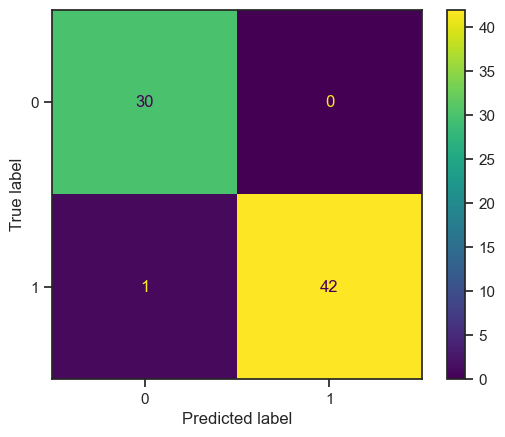

In [92]:
Drzewo_macierz = ConfusionMatrixDisplay.from_estimator(
    Drzewodezycyjne, x_testujacy_skalowane, y_testujacy)
Drzewo_macierz


In [93]:
Drzewodezycyjnestring = tree.export_text(Drzewodezycyjne)
print(Drzewodezycyjnestring)


|--- feature_4 <= 0.28
|   |--- feature_4 <= 0.14
|   |   |--- class: 0
|   |--- feature_4 >  0.14
|   |   |--- feature_4 <= 0.20
|   |   |   |--- class: 1
|   |   |--- feature_4 >  0.20
|   |   |   |--- feature_5 <= -0.31
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  -0.31
|   |   |   |   |--- feature_0 <= 0.49
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.49
|   |   |   |   |   |--- class: 0
|--- feature_4 >  0.28
|   |--- class: 1



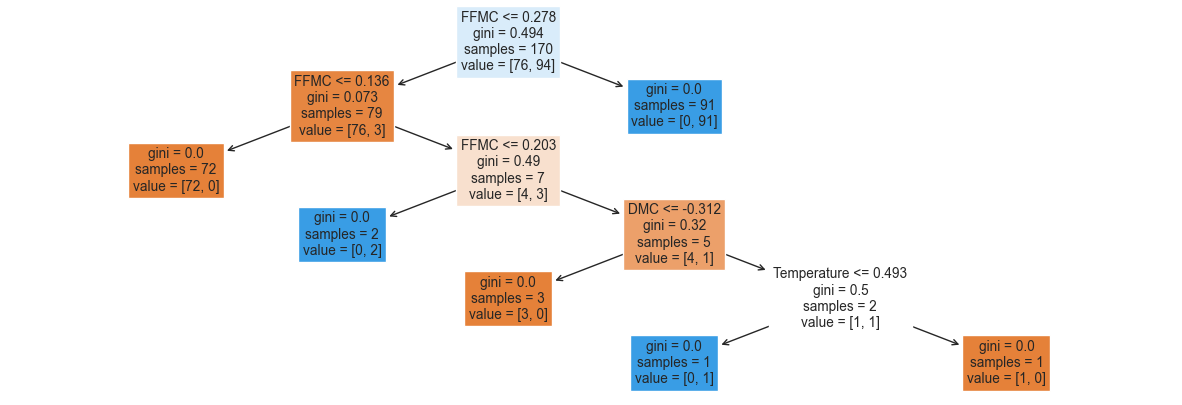

In [94]:
nazwy_atrybutow = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
'FWI']

plt.figure(figsize=(15, 5))
tree.plot_tree(Drzewodezycyjne,feature_names=nazwy_atrybutow, filled=True)
plt.show()


Drzewo decyzyjne ma cztery poziomy i służy do klasyfikacji obiektów na dwie klasy (0 i 1) na podstawie pięciu cech.

Na pierwszym poziomie drzewa następuje podział na podstawie wartości cechy x_4. Jeśli wartość tej cechy jest mniejsza lub równa 0.28, to algorytm przechodzi na drugi poziom, w przeciwnym przypadku przypisuje obiekt do klasy 1.

Na drugim poziomie drzewa algorytm ponownie dokonuje podziału na podstawie cechy x_4, ale tym razem z wartością większą niż 0.14. Jeśli wartość ta jest mniejsza lub równa 0.20, to obiekt zostaje przypisany do klasy 1, w przeciwnym przypadku algorytm przechodzi na trzeci poziom.

Na trzecim poziomie drzewa algorytm dokonuje podziału na podstawie wartości cechy x_2. Jeśli wartość tej cechy jest mniejsza lub równa -0.35, to obiektzostaje przypisany do klasy 0, w przeciwnym przypadku przechodzi na czwarty poziom.

Na czwartym poziomie drzewa algorytm dokonuje podziału na podstawie wartości cechy x_1. Jeśli wartość tej cechy jest mniejsza lub równa 0.76, to obiekt zostaje przypisany do klasy 1, w przeciwnym przypadku przypisuje mu się klasę 0.